<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/S3RegresionRidge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("winequalityN.csv")

In [3]:
df.shape

(6497, 13)

In [4]:
df.size

84461

In [5]:
df.ndim

2

In [6]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
df.isnull().sum().sum()

38

In [11]:
df.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [13]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


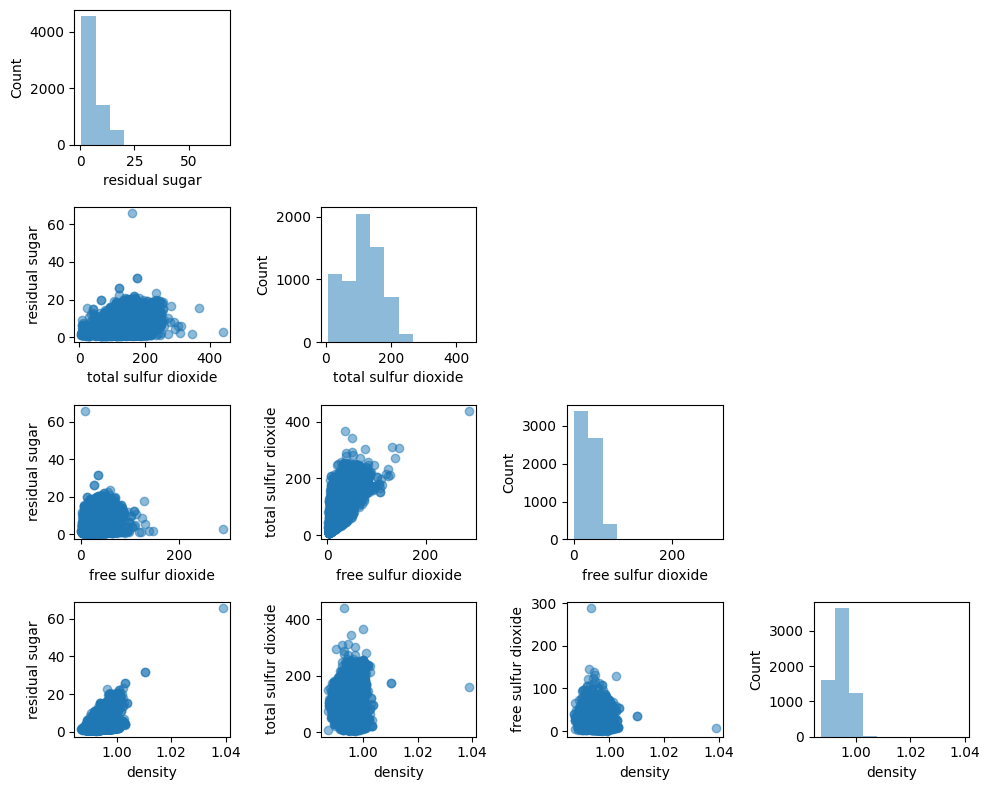

In [16]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ["residual sugar", "total sulfur dioxide", "free sulfur dioxide", "density"]
scatterplotmatrix(df[cols].values, figsize= (10,8), names= cols, alpha=0.5)
plt.tight_layout ()
plt.show()

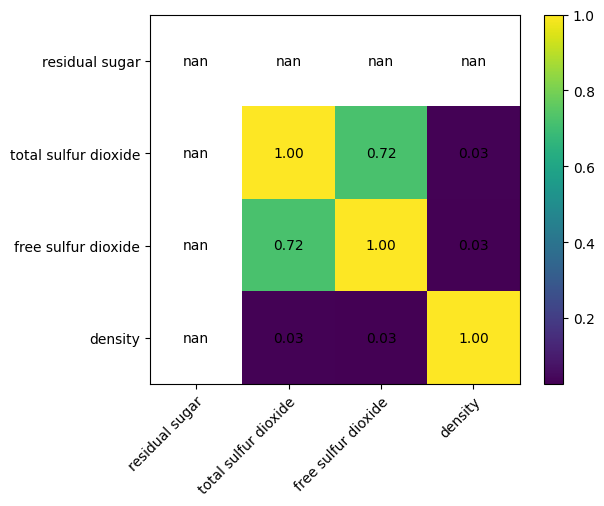

In [18]:
from mlxtend.plotting import heatmap
cm = np.corrcoef(df[cols].values.T)
hm = heatmap (cm, row_names=cols, column_names=cols)
plt.show()

In [20]:
import seaborn as sb

<ipython-input-21-dcf193bffd57>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True, cmap="YlGnBu")


<Axes: >

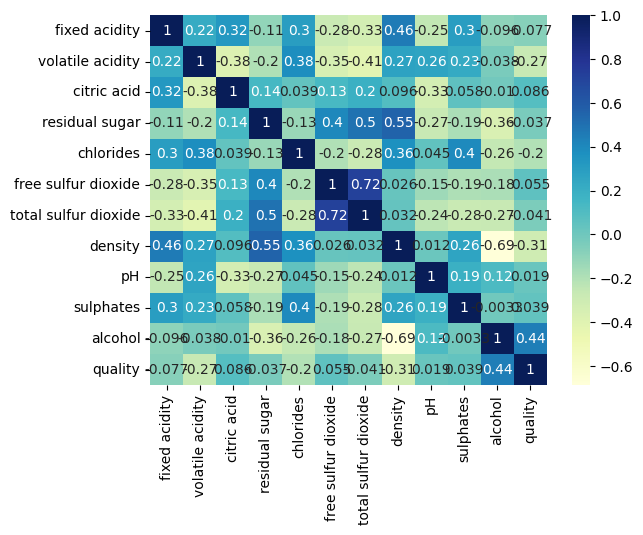

In [21]:
sb.heatmap(df.corr(),annot=True, cmap="YlGnBu")

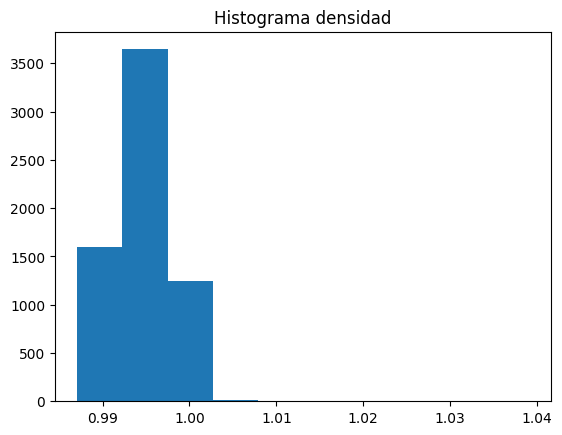

In [22]:
plt.hist(df["density"])
plt.title("Histograma densidad")
plt.show()

In [23]:
X = df["density"]
y = df["alcohol"]

In [24]:
X_proc = X.values.reshape(-1,1)


y_procesada = y.values.reshape(-1,1)

In [25]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X_proc, y_procesada, test_size=.2)

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [27]:
lr.fit(X_ent, y_ent)

LinearRegression()

In [28]:
print(lr.score(X_ent, y_ent))

0.4623388367598945


In [29]:
from sklearn.linear_model import Ridge

In [32]:
print (X_ent.shape)
print (y_ent.shape)

(5197, 1)
(5197, 1)


In [34]:
clf = Ridge ()

In [35]:
clf.fit(X_ent, y_ent)

Ridge()

In [36]:
y_pred = clf.predict(X_pru)

In [37]:
comparativa = {"Predicción": np.squeeze(y_pred), "Valor Real": np.squeeze(y_pru)}
pd.DataFrame(comparativa)

,Predicción,Valor Real
0,10.467685,10.0
1,10.518398,11.4
2,10.508497,9.9
3,10.489902,9.5
4,10.477345,11.0
...,...,...
1295,10.556311,13.1
1296,10.485435,9.6
1297,10.518398,11.5
1298,10.552206,13.0


In [43]:
print("Pendiente: %.2f" % clf.coef_[0])

Pendiente: -12.07


In [44]:
print("Ordenada;  %.2f" % clf.intercept_)

Ordenada;  22.51


In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pru, y_pred)

1.3802384931737186

In [46]:
np.sqrt(mean_squared_error(y_pru, y_pred))

1.1748355174975424

In [48]:
print ("R 2: %.2f" % clf.score(X_pru, y_pru))

R 2: 0.04


In [50]:
from sklearn.metrics import r2_score

In [51]:
r2 = r2_score(y_pru, y_pred)

In [52]:
r2

0.04159381520293526